In [44]:
# Stocks price predection
# Import modules

import yfinance as yf
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np

In [45]:
# Import tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Input

In [46]:
# Import ARIMA

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

### Get data

In [4]:
# Dataset 1: Barclays

ticker = "BARC.L"

data1 = yf.download(ticker , start="2015-01-01", end="2025-01-01", auto_adjust=False)

data1.to_csv("barclays_data.csv")

[*********************100%***********************]  1 of 1 completed


In [47]:
# Dataset 2: Shell

ticker = "SHEL.L"

data2 = yf.download(ticker , start="2015-01-01", end="2025-01-01", auto_adjust=False)

data2.to_csv("shell_data.csv")

[*********************100%***********************]  1 of 1 completed


In [6]:
# Dataset 3: Haleon

ticker = "HLN.L"

data3 = yf.download(ticker , start="2015-01-01", end="2025-01-01", auto_adjust=False)

data3.to_csv("haleon_data.csv")

[*********************100%***********************]  1 of 1 completed


In [7]:
# Dataset 4: Rightmove

ticker = "RMV.L"

data4 = yf.download(ticker , start="2015-01-01", end="2025-01-01", auto_adjust=False)

data4.to_csv("rightmove_data.csv")

[*********************100%***********************]  1 of 1 completed


In [8]:
# Dataset 5: Experian

ticker = "EXPN.L"

data5 = yf.download(ticker , start="2015-01-01", end="2025-01-01", auto_adjust=False)

data5.to_csv("experian_data.csv")

[*********************100%***********************]  1 of 1 completed


### Preprocessing

In [9]:
data1.shape

(2526, 6)

In [10]:
data1.isnull().sum()

Price      Ticker
Adj Close  BARC.L    0
Close      BARC.L    0
High       BARC.L    0
Low        BARC.L    0
Open       BARC.L    0
Volume     BARC.L    0
dtype: int64

In [11]:
data1

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BARC.L,BARC.L,BARC.L,BARC.L,BARC.L,BARC.L
Date,,,,,,
2015-01-02,242.416000,243.149994,245.600006,241.550003,242.199997,20219711
2015-01-05,233.991470,234.699997,243.149994,234.199997,242.300003,39050852
2015-01-06,229.654617,230.350006,235.850006,230.250000,234.050003,37573308
2015-01-07,229.903900,230.600006,233.460007,230.149994,232.100006,37219841
2015-01-08,236.334381,237.050003,238.350006,231.550003,234.300003,41082776
...,...,...,...,...,...,...
2024-12-23,261.531952,261.600006,262.049988,259.299988,261.200012,13605305
2024-12-24,263.481384,263.549988,264.181000,262.273010,262.950012,8298189


In [12]:
data1.columns = data1.columns.droplevel(1)

In [13]:
data1 = data1.reset_index()

In [14]:
data1

Price,Date,Adj Close,Close,High,Low,Open,Volume
0,2015-01-02,242.416000,243.149994,245.600006,241.550003,242.199997,20219711
1,2015-01-05,233.991470,234.699997,243.149994,234.199997,242.300003,39050852
2,2015-01-06,229.654617,230.350006,235.850006,230.250000,234.050003,37573308
3,2015-01-07,229.903900,230.600006,233.460007,230.149994,232.100006,37219841
4,2015-01-08,236.334381,237.050003,238.350006,231.550003,234.300003,41082776
...,...,...,...,...,...,...,...
2521,2024-12-23,261.531952,261.600006,262.049988,259.299988,261.200012,13605305
2522,2024-12-24,263.481384,263.549988,264.181000,262.273010,262.950012,8298189
2523,2024-12-27,264.831085,264.899994,265.899994,263.540009,264.350006,15970484
2524,2024-12-30,264.681091,264.750000,265.750000,261.399994,262.600006,14724719


In [15]:
data1.drop(["Close", "High", "Low", "Open", "Volume"], axis = 1, inplace = True)

In [16]:
data1

Price,Date,Adj Close
0,2015-01-02,242.416000
1,2015-01-05,233.991470
2,2015-01-06,229.654617
3,2015-01-07,229.903900
4,2015-01-08,236.334381
...,...,...
2521,2024-12-23,261.531952
2522,2024-12-24,263.481384
2523,2024-12-27,264.831085
2524,2024-12-30,264.681091


In [17]:
data1.describe

<bound method NDFrame.describe of Price       Date   Adj Close
0     2015-01-02  242.416000
1     2015-01-05  233.991470
2     2015-01-06  229.654617
3     2015-01-07  229.903900
4     2015-01-08  236.334381
...          ...         ...
2521  2024-12-23  261.531952
2522  2024-12-24  263.481384
2523  2024-12-27  264.831085
2524  2024-12-30  264.681091
2525  2024-12-31  268.080231

[2526 rows x 2 columns]>

In [18]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2526 entries, 0 to 2525
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2526 non-null   datetime64[ns]
 1   Adj Close  2526 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 39.6 KB


Text(0, 0.5, 'Adjusted close')

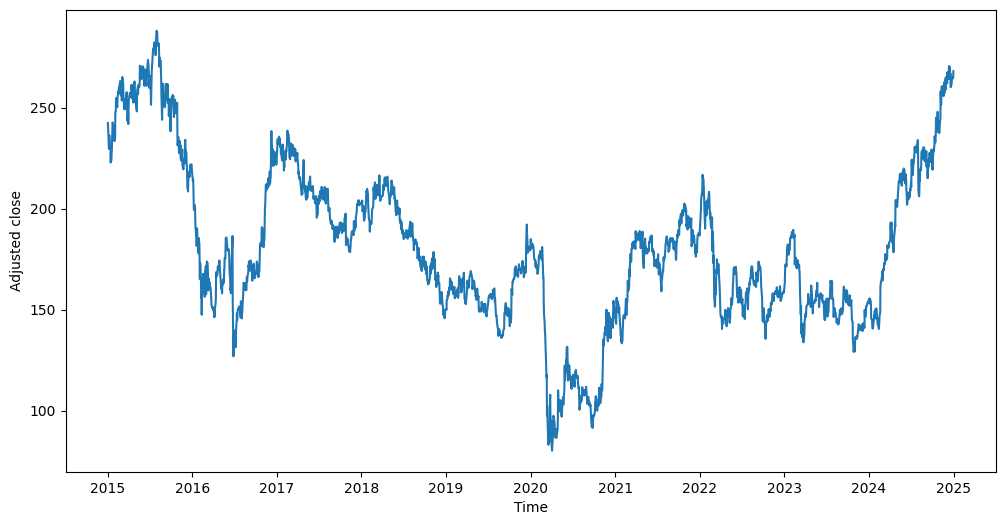

In [45]:
# Plot the data

plt.figure(figsize = (12,6))
plt.plot(data1["Date"], data1["Adj Close"])
plt.xlabel("Time")
plt.ylabel("Adjusted close")

In [20]:
data_ajdc = data1[["Adj Close"]].values

In [21]:
# Train Test Split
train_size = int(len(data_ajdc) * 0.8)
train_data = data_ajdc[:train_size]
test_data  = data_ajdc[train_size:]

In [22]:
train_data

array([[242.41600037],
       [233.99147034],
       [229.65461731],
       ...,
       [157.55464172],
       [158.6933136 ],
       [159.15278625]])

In [23]:
# Scale the data via RobustScaler

scaler = preprocessing.RobustScaler(with_centering= True,           # Hyperparameter
                                    with_scaling= True,             # HyperParameter
                                    quantile_range= (25.0, 75.0))    # Default
scaler.fit(train_data)
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

In [24]:
#X_train X_test, t_train, y_test split

def create_dataset(dataset, time_step = 1):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

In [25]:
time_step = 60        # Hyperparameter
X_train, y_train = create_dataset(train_scaled, time_step)
X_test, y_test = create_dataset(test_scaled, time_step)

In [26]:
print("Train samples:", X_train.shape)
print("Test samples:", X_test.shape)

Train samples: (1960, 60)
Test samples: (446, 60)


In [27]:
# Reshape to fit the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test  = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [28]:
print("Train samples:", X_train.shape)
print("Test samples:", X_test.shape)

Train samples: (1960, 60, 1)
Test samples: (446, 60, 1)


### Model: LSTM

In [29]:
# Build the model
model = Sequential([
    Input(shape=(60, 1)),          
    LSTM(50, return_sequences=True),
    LSTM(50, return_sequences=True),
    LSTM(50),
    Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="adam")

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.1359 - val_loss: 0.0413
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0371 - val_loss: 0.0299
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0301 - val_loss: 0.0343
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0292 - val_loss: 0.0267
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0258 - val_loss: 0.0217
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0245 - val_loss: 0.0209
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0223 - val_loss: 0.0185
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0211 - val_loss: 0.0204
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0200 - val_loss: 0.0173
Epoch 10/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0195 - val_loss: 0.0158
Epoch 11/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0184 - val_loss: 0.0142
Epoch 12/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step

In [32]:
# Predict from the model
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [33]:
train_predict_inv = scaler.inverse_transform(train_predict)
test_predict_inv = scaler.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

In [ ]:
math.sqrt(mean_squared_error(y_test, test_predict))

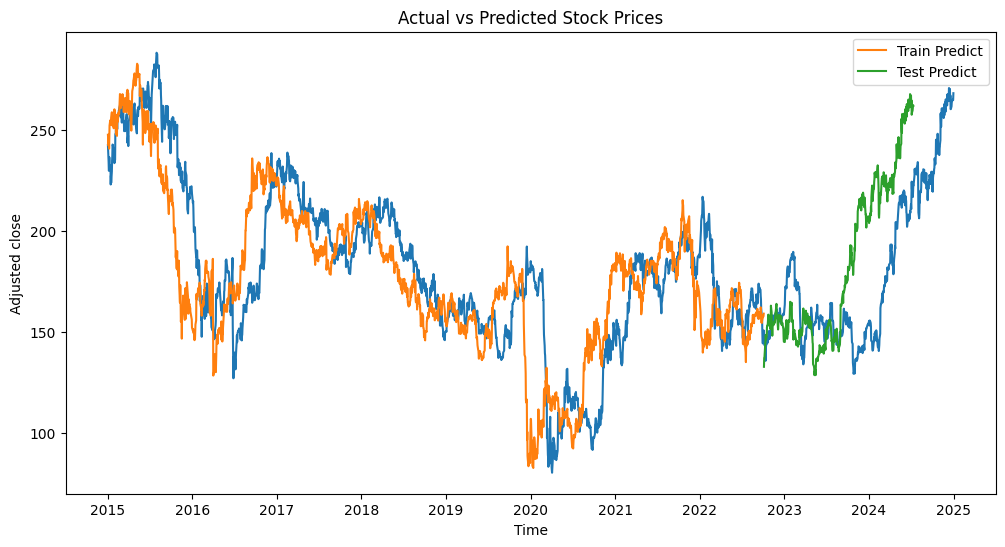

In [39]:
plt.figure(figsize = (12,6))
plt.plot(data1["Date"], data1["Adj Close"])
plt.plot(data1["Date"][:len(train_predict_inv)], train_predict_inv, label="Train Predict")
plt.plot(data1["Date"][len(train_predict_inv):len(train_predict_inv)+len(test_predict_inv)], 
         test_predict_inv, label="Test Predict")
plt.xlabel("Time")
plt.ylabel("Adjusted close")
plt.title("Actual vs Predicted Stock Prices")
plt.legend()

### Model: ARIMA

In [48]:
result = adfuller(data2['Adj Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -1.7105531377887986
p-value: 0.4256835492599499


In [41]:
data_diff = data2['Adj Close'].diff().dropna()

In [42]:
adfuller(data_diff)

(np.float64(-49.934451723009175),
 0.0,
 0,
 2524,
 {'1%': np.float64(-3.4329434877271816),
  '5%': np.float64(-2.862685793891119),
  '10%': np.float64(-2.567379949649765)},
 np.float64(13404.694341546412))

In [49]:
data2.columns = data2.columns.droplevel(1)
data2 = data2.reset_index()

In [50]:
data2.drop(["Close", "High", "Low", "Open", "Volume"], axis = 1, inplace = True)

Text(0, 0.5, 'Adjusted close')

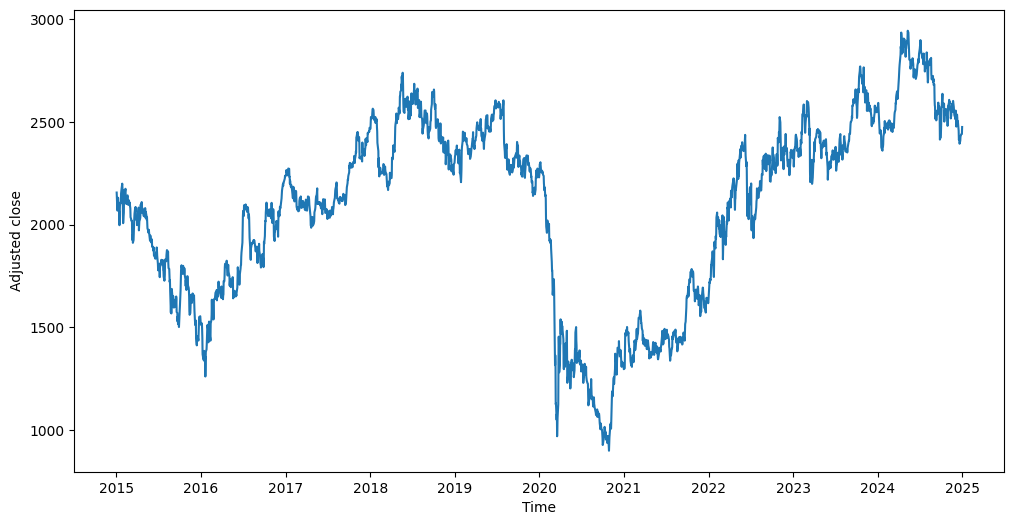

In [51]:
# Plot the data

plt.figure(figsize = (12,6))
plt.plot(data2["Date"], data2["Adj Close"])
plt.xlabel("Time")
plt.ylabel("Adjusted close")

In [54]:
data2["log"] = np.log(data2["Adj Close"])

Text(0, 0.5, 'Adjusted close')

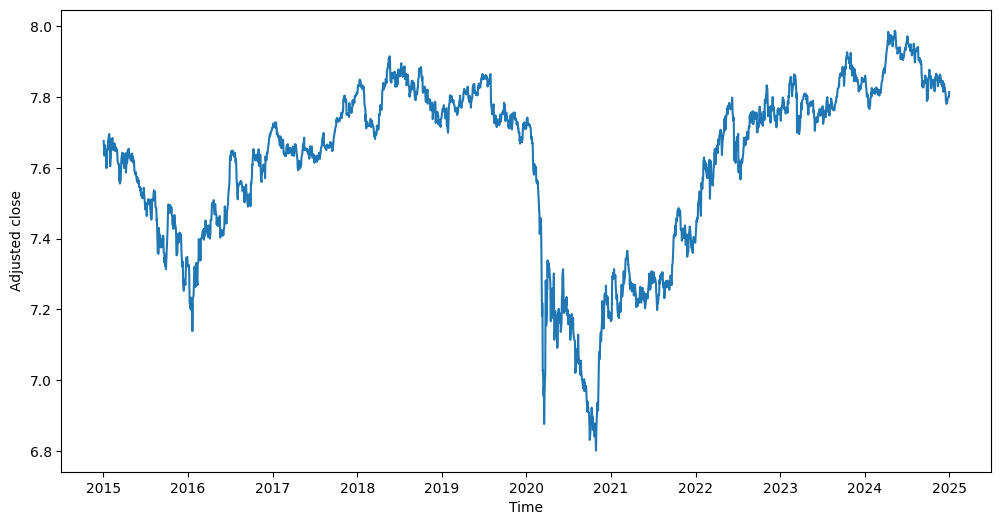

In [55]:
plt.figure(figsize = (12,6))
plt.plot(data2["Date"], data2["log"])
plt.xlabel("Time")
plt.ylabel("Adjusted close")

In [60]:
data2["diff"] = data2["Adj Close"].diff()
data2 = data2.replace([np.inf, -np.inf], np.nan).dropna(subset=["diff"])

Text(0, 0.5, 'Adjusted close')

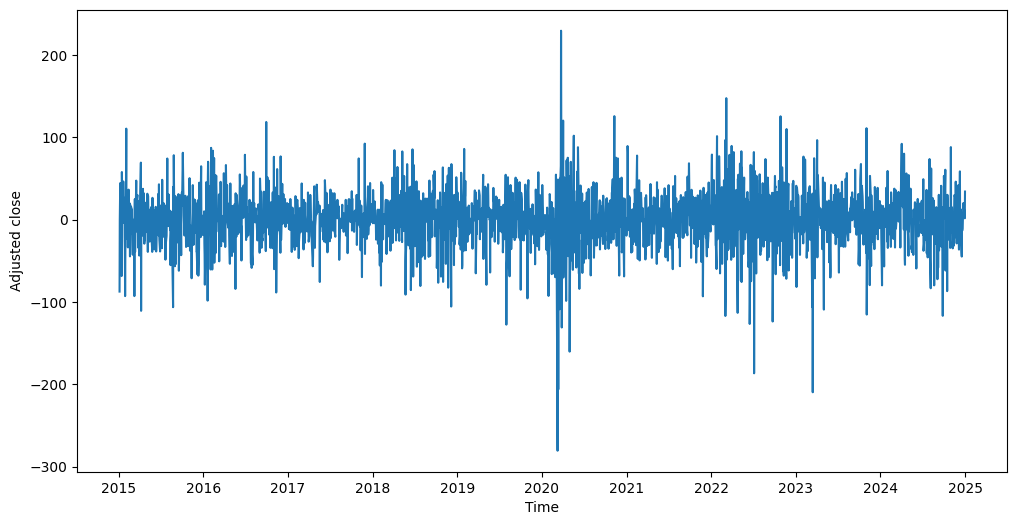

In [58]:
plt.figure(figsize = (12,6))
plt.plot(data2["Date"], data2["diff"])
plt.xlabel("Time")
plt.ylabel("Adjusted close")

In [61]:
#from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(data2["diff"])
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

ADF Statistic: -37.12002985968803
p-value: 0.0


In [63]:
data_ajdc = data2[["Adj Close"]].values

In [69]:
train_size = int(len(data_ajdc) * 0.7)
train_data = data_ajdc[:train_size]
test_data  = data_ajdc[train_size:]

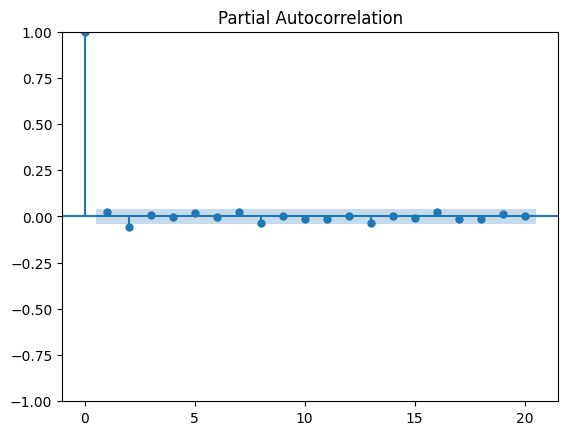

In [76]:
plot_pacf(data2["diff"], lags=20)
plt.show()

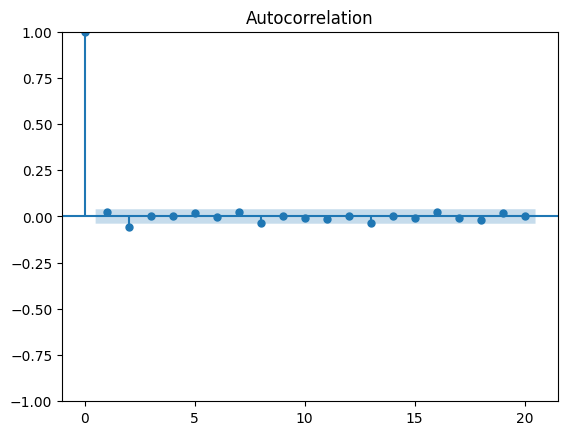

In [77]:
plot_acf(data2["diff"], lags=20)
plt.show()

In [ ]:
#from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data, order=(2, 1, q))
model_fit = model.fit()

### Model: SARIMAX

### Model: Prophet